# Veri Analizi

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)

In [12]:
train.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,0.210526,0.584408,0.542470,1.209178,0.653374,-0.129709,0.0,0.0,0.0,1.0,103000.0
1,1.052632,0.734467,0.999286,0.156884,1.061350,0.120872,0.0,0.0,0.0,1.0,382100.0
2,-1.315789,-0.135991,-0.302641,-0.268943,-0.226994,0.276686,0.0,0.0,0.0,1.0,172600.0
3,0.368421,-0.415006,-0.199857,0.267876,-0.168712,-0.726634,0.0,0.0,0.0,1.0,93400.0
4,0.736842,0.148300,-0.017131,-0.312700,-0.092025,0.003807,1.0,0.0,0.0,0.0,96500.0


In [13]:
test.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-0.210526,-0.365768,-0.00571,0.240128,-0.156442,-0.845058,1.0,0.0,0.0,0.0,47700.0
1,0.052632,0.477140,-0.00571,0.424760,0.533742,-0.459783,1.0,0.0,0.0,0.0,45800.0
2,1.210526,0.997069,-0.00571,0.152615,1.696319,-0.029776,0.0,0.0,1.0,0.0,500001.0
3,-0.631579,0.540445,-0.00571,0.574173,0.260736,0.993349,0.0,0.0,0.0,0.0,218600.0
4,0.263158,0.130129,-0.00571,-0.110993,0.055215,0.081216,0.0,0.0,0.0,1.0,278000.0


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   housing_median_age          16512 non-null  float64
 1   total_rooms                 16512 non-null  float64
 2   total_bedrooms              16512 non-null  float64
 3   population                  16512 non-null  float64
 4   households                  16512 non-null  float64
 5   median_income               16512 non-null  float64
 6   ocean_proximity_INLAND      16512 non-null  float64
 7   ocean_proximity_ISLAND      16512 non-null  float64
 8   ocean_proximity_NEAR BAY    16512 non-null  float64
 9   ocean_proximity_NEAR OCEAN  16512 non-null  float64
 10  median_house_value          16512 non-null  float64
dtypes: float64(11)
memory usage: 1.5 MB


In [21]:
train[train.columns[:6]].describe().T

,count,mean,std,min,25%,50%,75%,max
housing_median_age,16512.0,-0.020617,0.663289,-1.473684,-0.578947,0.000000e+00,0.421053,1.210526
total_rooms,16512.0,0.300706,1.274705,-1.246776,-0.395662,0.000000e+00,0.604338,21.800117
total_bedrooms,16512.0,0.289784,1.196309,-1.244825,-0.400428,0.000000e+00,0.599572,17.153462
population,16512.0,0.276898,1.213507,-1.242263,-0.403415,0.000000e+00,0.596585,36.835646
households,16512.0,0.276033,1.168613,-1.254601,-0.398773,0.000000e+00,0.601227,17.398773
median_income,16512.0,0.151805,0.863048,-1.380437,-0.443739,9.999055e-17,0.556261,5.191221


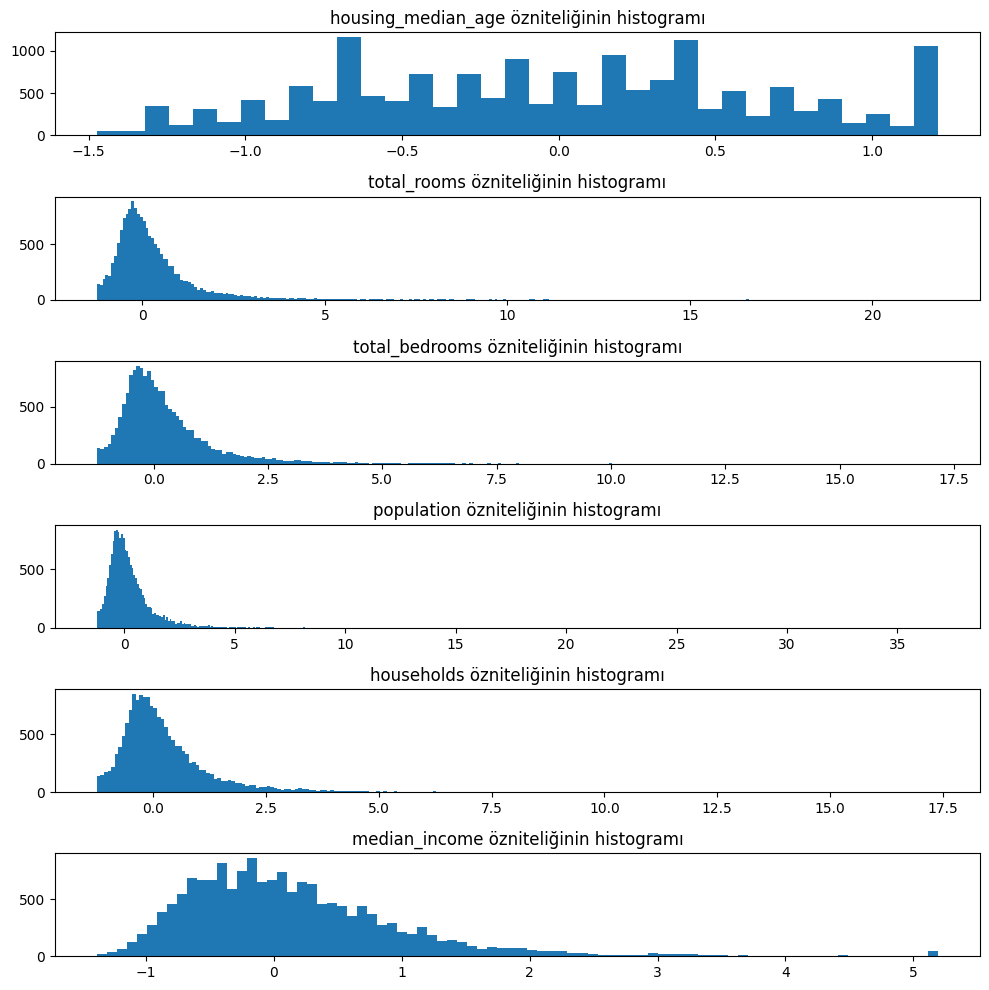

In [28]:
float_cols = train.columns[:6].values

fig, axs = plt.subplots(len(float_cols), figsize=(10, 10))

for i, feature in enumerate(float_cols):
    ax = axs[i]
    ax.hist(train[feature], bins='auto')
    ax.set_title(f'{feature} özniteliğinin histogramı')

plt.tight_layout()
plt.show()

In [35]:
X = train.drop(columns=['median_house_value'])
y = train['median_house_value']

In [36]:
# Veriye "bias" ekleyelim
X_b = np.c_[np.ones((len(X), 1)), X]

# Güncellenecek katsayıları random değerlerle başlatalım
theta = np.random.randn(X_b.shape[1], 1)

# Öğrenme oranı ve iterasyon sayısını belirleyelim
learning_rate = 0.01
iterations = 1000

# Gradient descent algoritması
def compute_cost(X, y, theta):
    """
    X : özniteliklerin değerleri -> vector (1 boyutlu numpy array)
    y : hedef değerler -> vector (1 boyutlu numpy array)
    theta : tahminler -> vector (1 boyutlu numpy array)

    Maliyet'i döndürür -> float
    """
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

In [37]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations) # grafik için
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1/m) * X.T.dot(errors)
        theta = theta - learning_rate * gradient
        cost_history[i] = compute_cost(X, y, theta)
    
    return theta, cost_history

theta_final, cost_history = gradient_descent(X_b, y.values.reshape(-1, 1), theta, learning_rate, iterations)

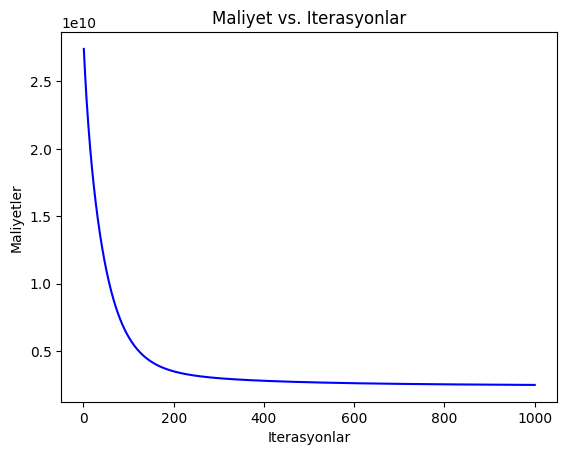

In [38]:
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.xlabel('Iterasyonlar')
plt.ylabel('Maliyetler')
plt.title('Maliyet vs. Iterasyonlar')
plt.show()

In [39]:
# Veri setinin son katsayıları
theta_final

array([[197074.29561533],
       [ 27126.86879788],
       [ -8424.34873639],
       [ 21312.05519064],
       [-27114.80668151],
       [ 21935.44763277],
       [ 91807.12067296],
       [-43529.27302776],
       [   495.71027925],
       [ 25195.27620178],
       [ 32634.40001149]])

In [41]:
# theta_final ile test verisi üzerinde tahmin yapabiliriz
X_test = test.drop('median_house_value', axis=1)
y_test = test['median_house_value']

# tahminden önce test verisine bias ekleyelim
X_test_b = np.c_[np.ones((len(X_test), 1)), X_test]

predictions = X_test_b.dot(theta_final)

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ortalama Mutlak Hata (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

# Ortalama Kare Hata (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)

# Kök Ortalama Kare Hata (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 51405.23962720822
Mean Squared Error (MSE): 5132486318.322577
Root Mean Squared Error (RMSE): 71641.37295112773


In [45]:
mae/test.median_house_value.mean() * 100

25.014677461563018

%25'lik bir hata oranıyla ev fiyatını tahmin edebiliyoruz.